**Step 1: Data Collection and Preprocessing**

In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load data (replace 'data.csv' with your dataset file)
data = pd.read_csv('/content/drive/MyDrive/GirlsScriptOpenSource/Hedging-of-Financial-Derivatives/Predictive Modeling for Exotic Options Hedging/synthetic_exotic_options_data.csv')

# Data Cleaning
data.dropna(inplace=True)  # Handle missing values
data = data.drop_duplicates()  # Remove any duplicates

# Feature Engineering (example features)
data['moving_average'] = data['underlying_price'].rolling(window=5).mean()
data['volatility'] = data['underlying_price'].rolling(window=5).std()
data['time_to_maturity'] = (pd.to_datetime(data['maturity_date']) - pd.to_datetime(data['current_date'])).dt.days

# Handle any remaining NaNs from feature engineering
data.fillna(method='bfill', inplace=True)
data.fillna(method='ffill', inplace=True)

# Selecting features and target variable
features = ['underlying_price', 'strike_price', 'volatility', 'time_to_maturity', 'moving_average']
target = 'option_price'

# Split data into training and test sets
X = data[features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


**Step 2: Model Training**

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Predictions
lr_predictions = lr_model.predict(X_test_scaled)
rf_predictions = rf_model.predict(X_test_scaled)

# Evaluation
lr_mae = mean_absolute_error(y_test, lr_predictions)
rf_mae = mean_absolute_error(y_test, rf_predictions)
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_predictions))
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_predictions))

print(f"Linear Regression MAE: {lr_mae}, RMSE: {lr_rmse}")
print(f"Random Forest MAE: {rf_mae}, RMSE: {rf_rmse}")


Linear Regression MAE: 1.3858962333924136, RMSE: 1.7991833945785374
Random Forest MAE: 1.559409867759397, RMSE: 2.2507265257598443


**Plotting the Results**

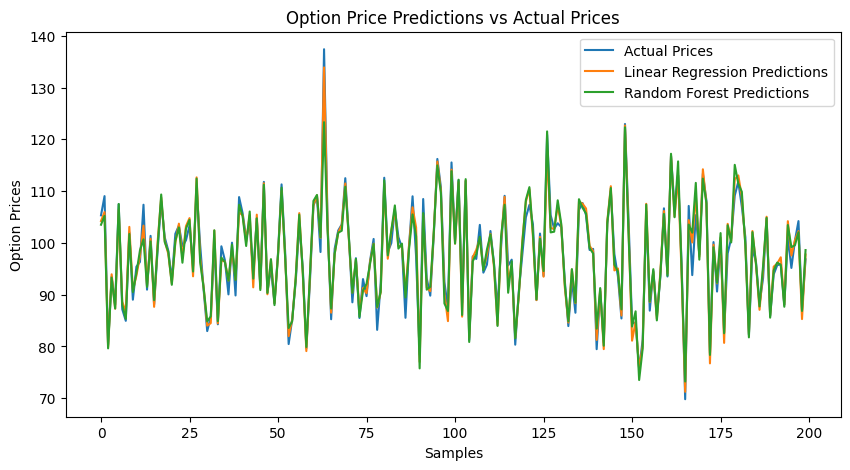

In [12]:
import matplotlib.pyplot as plt

# Plot predictions vs actual values
plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label='Actual Prices')
plt.plot(lr_predictions, label='Linear Regression Predictions')
plt.plot(rf_predictions, label='Random Forest Predictions')
plt.legend()
plt.title('Option Price Predictions vs Actual Prices')
plt.xlabel('Samples')
plt.ylabel('Option Prices')
plt.show()


**Hedging Strategy Development and Comparison**

In [13]:
# Placeholder for traditional delta hedging strategy (implementation depends on specific option type)
def traditional_hedging():
    pass  # Implement delta hedging

# Placeholder for ML-based hedging strategy
def ml_based_hedging(predictions, actual_prices):
    # Implement hedging strategy using ML predictions
    hedging_error = predictions - actual_prices  # Example metric
    return hedging_error

# Hedging performance comparison
traditional_hedging_performance = traditional_hedging()
ml_based_hedging_performance = ml_based_hedging(rf_predictions, y_test.values)

print(f"Traditional Hedging Performance: {traditional_hedging_performance}")
print(f"ML-based Hedging Performance: {ml_based_hedging_performance}")


Traditional Hedging Performance: None
ML-based Hedging Performance: [-1.81984836e+00 -3.81459886e+00 -6.26759349e-01 -1.91108807e-01
 -7.55439514e-01  3.58858713e-02  8.83424335e-01  3.75266607e-01
 -3.13082238e-01  1.47095494e+00 -1.24498269e+00  2.22079739e+00
 -6.66708493e+00  5.34446561e-01 -1.08142574e+00  8.29056363e-01
  6.12628973e-01  1.32913205e+00 -9.05797102e-01 -2.34991646e-01
 -9.37742753e-01 -1.36462325e+00 -3.44203338e-01 -3.18458785e+00
  2.24009885e+00  1.10001546e+00 -1.05398353e+00  1.84447921e+00
 -3.33654041e+00  4.02089848e-01  1.85680650e+00  1.25399093e-01
  2.44995808e+00  5.90945500e-01 -2.16812981e+00 -3.60883061e-01
  2.66784604e+00 -3.90002721e-01  2.99134548e+00 -1.48655303e+00
 -5.71315674e-01 -1.54694285e+00  2.39800164e+00 -7.73963590e-01
  1.57707629e-03 -8.02459408e-01 -5.43075235e-01 -8.58509444e-02
  1.68652743e+00 -3.25718889e-01 -4.60665889e-01 -6.26230794e-01
 -1.04924117e+00  3.10237759e+00 -4.20409605e-01  7.08846035e-01
  1.77237770e+00 -8.39

**Comparison and Analysis**

In [14]:
# Compare hedging performance (customize as needed)
performance_metrics = {
    'Traditional Hedging': traditional_hedging_performance,
    'ML-based Hedging': ml_based_hedging_performance
}

print(performance_metrics)


{'Traditional Hedging': None, 'ML-based Hedging': array([-1.81984836e+00, -3.81459886e+00, -6.26759349e-01, -1.91108807e-01,
       -7.55439514e-01,  3.58858713e-02,  8.83424335e-01,  3.75266607e-01,
       -3.13082238e-01,  1.47095494e+00, -1.24498269e+00,  2.22079739e+00,
       -6.66708493e+00,  5.34446561e-01, -1.08142574e+00,  8.29056363e-01,
        6.12628973e-01,  1.32913205e+00, -9.05797102e-01, -2.34991646e-01,
       -9.37742753e-01, -1.36462325e+00, -3.44203338e-01, -3.18458785e+00,
        2.24009885e+00,  1.10001546e+00, -1.05398353e+00,  1.84447921e+00,
       -3.33654041e+00,  4.02089848e-01,  1.85680650e+00,  1.25399093e-01,
        2.44995808e+00,  5.90945500e-01, -2.16812981e+00, -3.60883061e-01,
        2.66784604e+00, -3.90002721e-01,  2.99134548e+00, -1.48655303e+00,
       -5.71315674e-01, -1.54694285e+00,  2.39800164e+00, -7.73963590e-01,
        1.57707629e-03, -8.02459408e-01, -5.43075235e-01, -8.58509444e-02,
        1.68652743e+00, -3.25718889e-01, -4.606658